In [1]:
using PyPlot

# Prox of nonnegative regularizer

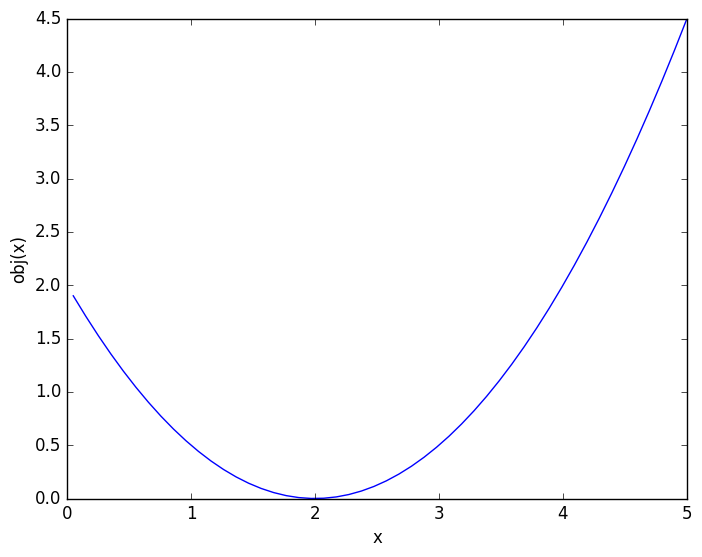

PyObject <matplotlib.text.Text object at 0x322cc9590>

In [2]:
# prox of nonneg minimizes I(x>=0) + 1/2(x-z)^2
z = 2
x = linspace(-5, 5, 100)
objx = [xi<0?Inf:0 + 1/2*(xi-z)^2 for xi in x]
plot(x, objx)
xlabel("x")
ylabel("obj(x)")

In [3]:
prox_nonneg(x) = max(0,x)

x = randn(2)
x /= norm(x)
px = prox_nonneg(x)

  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/madeleine/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/madeleine/.julia/v0.5/IJulia/src/kernel.jl:31
i

2-element Array{Float64,1}:
 0.66465 
 0.747155

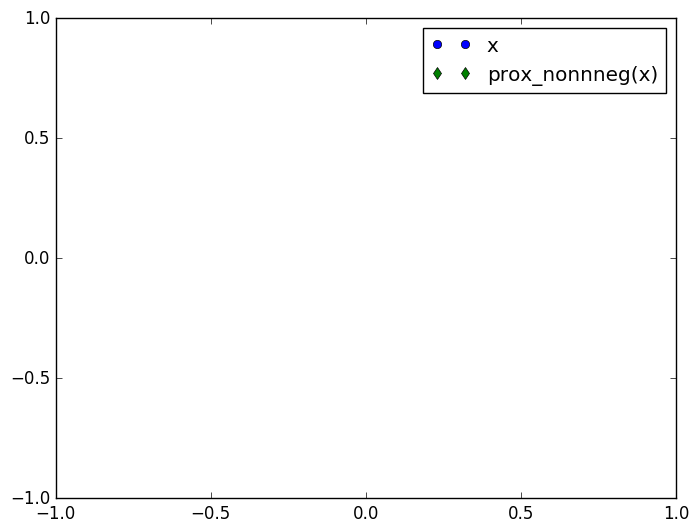

PyObject <matplotlib.legend.Legend object at 0x32285b790>

In [4]:
plot(x[1],x[2],"o",label="x")
plot(px[1],px[2],"d",label="prox_nonnneg(x)")
xlim([-1,1])
ylim([-1,1])
legend()

# Prox of l1 regularizer

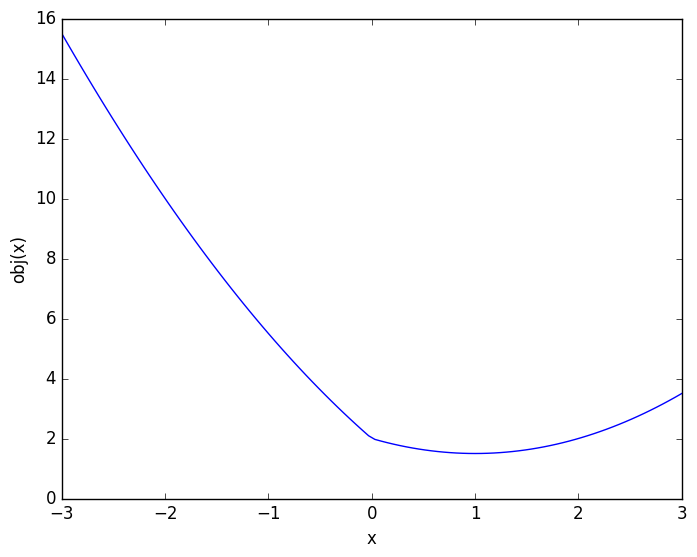

PyObject <matplotlib.text.Text object at 0x3228c1b90>

In [5]:
# prox of l1 minimizes |x| + 1/2(x-z)^2
z = 2
x = linspace(-3, 3, 100)
objx = [abs(xi) + 1/2*(xi-z)^2 for xi in x]
plot(x, objx)
xlabel("x")
ylabel("obj(x)")

In [6]:
function prox_l1(x::Number, alpha=1)
    if x > alpha
        return x-alpha
    elseif x < -alpha
        return x + alpha
    else
        return 0
    end
end
function prox_l1(x::AbstractArray, alpha=1)
    return reshape(Float64[prox_l1(xi, alpha) for xi in x], size(x))
end

prox_l1 (generic function with 4 methods)

In [7]:
@show x = randn()
@show px = prox_l1(x);

x = randn() = -0.8039421965229652
px = prox_l1(x) = 0


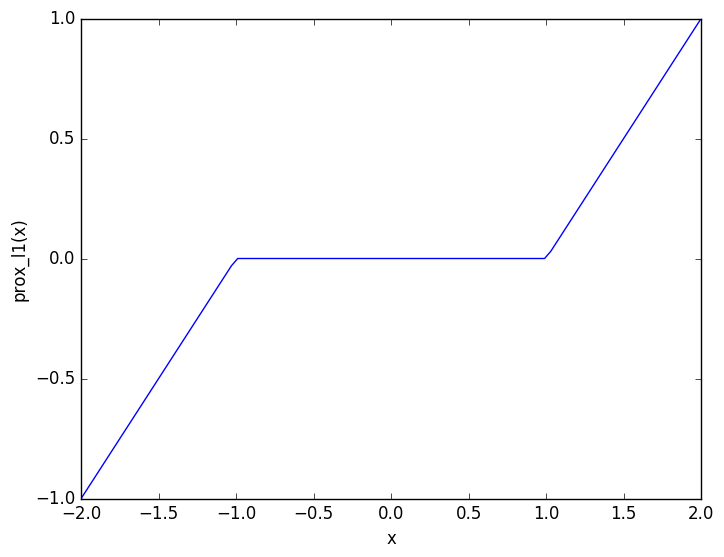

PyObject <matplotlib.text.Text object at 0x322a15190>

In [8]:
x = linspace(-2, 2, 100)
px = [prox_l1(xi) for xi in x]
plot(x, px)
xlabel("x")
ylabel("prox_l1(x)")

In [9]:
@show x = randn(2)
@show px = prox_l1(x);

x = randn(2) = [0.761498,0.527581]
px = prox_l1(x) = [0.0,0.0]


# proximal gradient method

$$\nabla \|Xw-y\|^2 = \nabla((Xw-y)^T (Xw-y)) = 2X^T(Xw-y)$$

In [10]:
# proximal gradient method for quadratic loss and nonnegative regularizer
function proxgrad_quad_nonneg(X, y; maxiters = 10, stepsize = 1, w = zeros(size(X,2)))
    w = zeros(size(X,2))
    objval = Float64[]
    for i=1:maxiters
        # gradient step
        g = 2X'*(X*w-y) # compute quadratic gradient
        w = w - stepsize*g
        # prox step
        w = prox_nonneg(w)
        # record objective value
        push!(objval, norm(X*w-y)^2 + any(w<0) ? Inf : 0)
    end
    return w, objval
end

proxgrad_quad_nonneg (generic function with 1 method)

In [11]:
# proximal gradient method for quadratic loss and l1 regularizer
function proxgrad_quad_l1(X, y; maxiters = 10, stepsize = 1, λ = 1, w = zeros(size(X,2)))
    objval = Float64[]
    for i=1:maxiters
        # gradient step
        g = 2X'*(X*w-y) # compute quadratic gradient
        w = w - stepsize*g
        # prox step
        w = prox_l1(w, stepsize*λ)
        # record objective value
        push!(objval, norm(X*w-y)^2 + norm(w,1))
    end
    return w, objval
end

proxgrad_quad_l1 (generic function with 1 method)

let's solve the problem $$\text{minimize} \quad (y-w)^2 + |w|$$

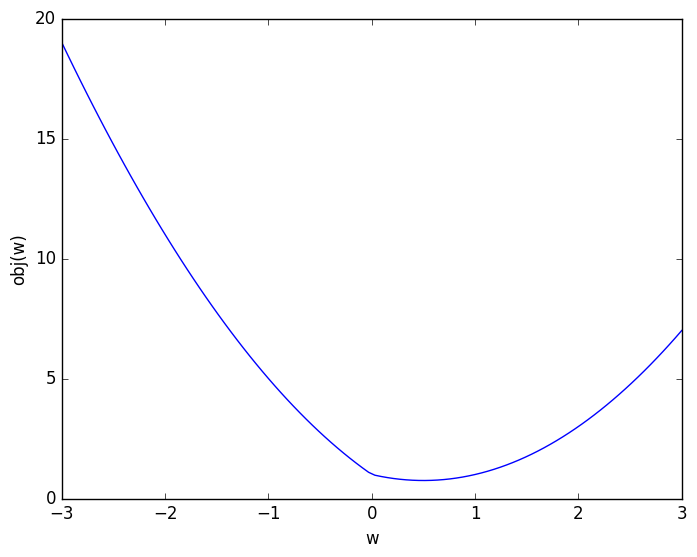

PyObject <matplotlib.text.Text object at 0x322a02a50>

In [12]:
y = 1
wvec = linspace(-3, 3, 100)
objwvec = [(wi-y)^2 + abs(wi) for wi in wvec]
plot(wvec, objwvec)
xlabel("w")
ylabel("obj(w)")

In [13]:
w = -2

-2

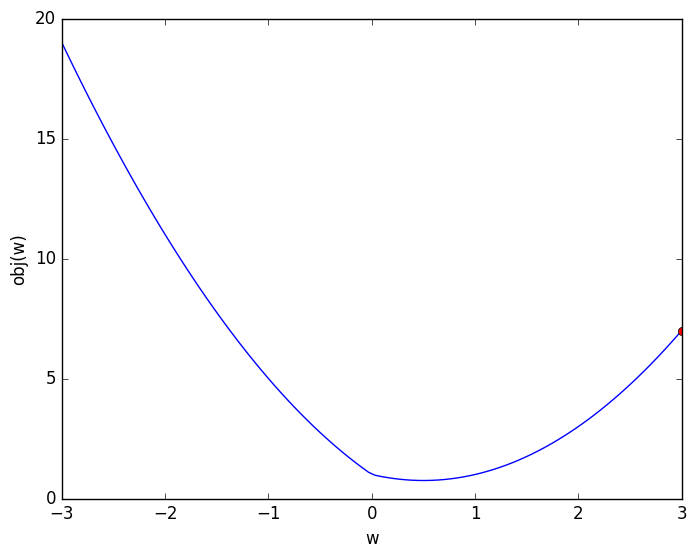

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x326168390>

In [14]:
w, obj = proxgrad_quad_l1(ones(1,1), ones(1); maxiters = 1, stepsize = 1, w = w)

plot(wvec, objwvec)
xlabel("w")
ylabel("obj(w)")
plot(w, obj[end], "ro")

# Introduce LowRankModels

In [15]:
using LowRankModels

In [16]:
# loss function
loss = QuadLoss()

LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain())

In [17]:
# regularizers
lambda = 1

nonneg = NonNegConstraint()
l1 = OneReg(lambda)
l2 = QuadReg(lambda)

LowRankModels.QuadReg(1.0)

In [18]:
# the quad loss returns the sum of square differences between its first and second argument
evaluate(loss, 2., 3.)

1.0

In [19]:
evaluate(3*loss, 2., 3.)

3.0

In [20]:
evaluate(1/2*loss, [2., 2.], [3., 3.])

1.0

In [21]:
# can also evaluate the gradient wrt the first argument
grad(loss, 2., 0.)

4.0

In [22]:
grad(loss, 0., 2.)

-4.0

In [23]:
grad(L1Loss(), 2., 0.)

1.0

In [24]:
# can evaluate the proximal operator of the regularizer
prox(nonneg, -1)

0

In [25]:
# can evaluate the proximal operator of lambda times the regularizer
λ = .01
prox(l1, 1, λ)

0.99

In [26]:
λ = .01
prox(l1, 1, λ)

0.99

In [27]:
# chain rule: 
# gradient of ||Xw - y||^2 wrt w is X' * <gradient of ||z-y||^2 wrt z>, 
# where z = X*w

In [28]:
import LowRankModels: evaluate, grad
evaluate(loss::Loss, X::Array{Float64,2}, w, y) = evaluate(loss, X*w, y)
grad(loss::Loss, X::Array{Float64,2}, w, y) = X'*grad(loss, X*w, y)

grad (generic function with 16 methods)

In [29]:
# proximal gradient method
function proxgrad(loss, reg, X, y; maxiters = 10, stepsize = 1)
    w = zeros(size(X,2))
    objval = Float64[]
    for i=1:maxiters
        # gradient step
        g = grad(loss, X, w, y)
        w = w - stepsize*g
        # prox step
        w = prox(reg, w, stepsize)
        # record objective value
        push!(objval, evaluate(loss, X, w, y) + evaluate(reg, w))
    end
    return w, objval
end

proxgrad (generic function with 1 method)

In [30]:
a = rand(4)
b = zeros(4)

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

In [31]:
a = b

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

In [32]:
b[1] = 1
b

4-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0

In [33]:
a

4-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0

In [34]:
# proximal gradient method
function proxgrad(loss::Loss, reg::Regularizer, X, y;
                  maxiters::Int = 10, stepsize::Number = 1., 
                  ch::ConvergenceHistory = ConvergenceHistory("proxgrad"))
    w = zeros(size(X,2))
    for t=1:maxiters
        t0 = time()
        # gradient step
        g = grad(loss, X, w, y)
        w = w - stepsize*g
        # prox step
        w = prox(reg, w, stepsize)
        # record objective value
        update_ch!(ch, time() - t0, obj = evaluate(loss, X, w, y) + evaluate(reg, w))
    end
    return w
end

proxgrad (generic function with 2 methods)

In [35]:
srand(0)
X, y = rand(6,3), rand(6);

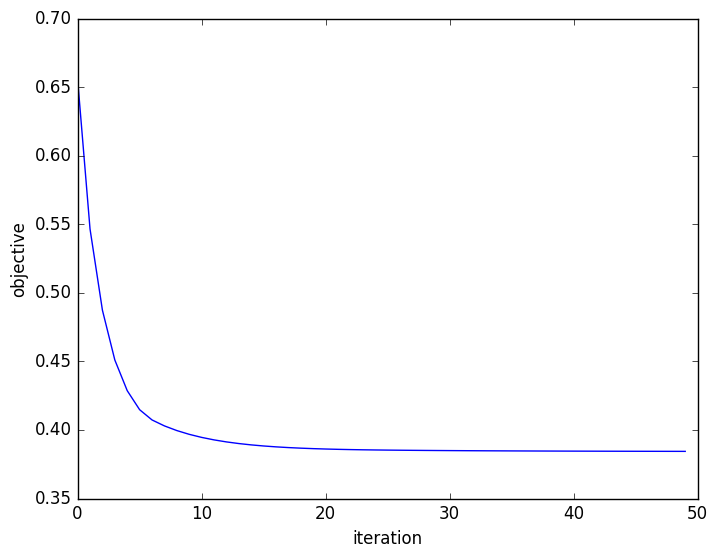

PyObject <matplotlib.text.Text object at 0x3261afd50>

In [36]:
ch = ConvergenceHistory("NNLS")
w = proxgrad(QuadLoss(), NonNegConstraint(), X, y; 
             stepsize=.1, maxiters=50,
             ch = ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

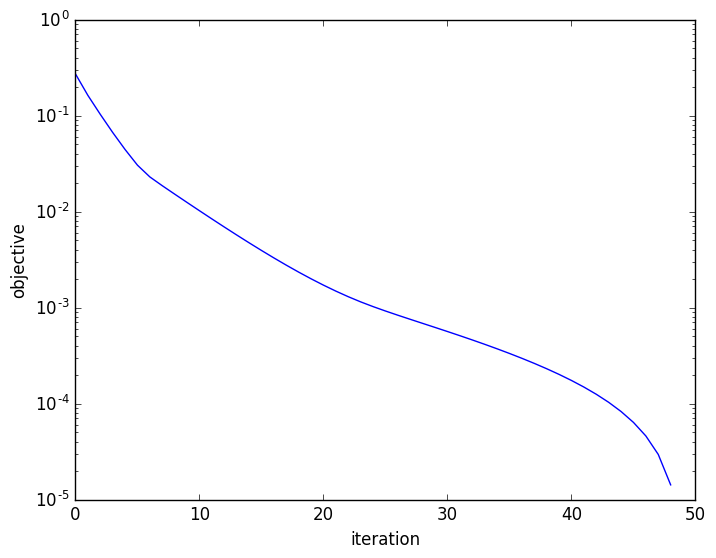

PyObject <matplotlib.text.Text object at 0x3264b4650>

In [37]:
semilogy(ch.objective - ch.objective[end])
xlabel("iteration")
ylabel("objective")

# Let's generate some more data and test out these models

In [38]:
function generate_data(n, w)
    X = randn(n,length(w))
    y = X*w
    return X, y
end

function generate_noisy_data(n, w)
    X = randn(n,length(w))
    y = X*w + .1*randn(n)
    return X, y
end

generate_noisy_data (generic function with 1 method)

# let's repeat what we did in the regularized regression notebook, using our nifty proximal gradient method

compare different kinds of regularized regression

In [39]:
function ridge_regression(X,y; λ=1, kwargs...)
    w = proxgrad(QuadLoss(), λ*QuadReg(), X, y; kwargs...)
    return w
end

ridge_regression (generic function with 1 method)

In [40]:
function nnls(X,y; kwargs...)
    w = proxgrad(QuadLoss(), NonNegConstraint(), X, y; kwargs...)
    return w
end

nnls (generic function with 1 method)

In [41]:
function lasso(X,y; λ=1, kwargs...)
    w = proxgrad(QuadLoss(), λ*OneReg(), X, y; kwargs...)
    return w
end

lasso (generic function with 1 method)

In [42]:
# generate data

d = 30
w_randn = randn(d)
w_sparse = sprandn(d, .5)
w_pos = sprand(d, .5);

w = w_pos

X, y = generate_noisy_data(30, w)

(
[-2.06216 -1.04361 … 2.51 0.493014; 0.246942 -1.67939 … -1.70603 0.152279; … ; -0.447924 -2.11102 … -0.628773 1.06545; 0.362531 1.21933 … 0.208612 1.11915],

[0.211505,-2.89382,-0.82731,1.89554,1.30355,-0.962532,-0.634707,-4.57862,-0.652612,0.269724  …  1.55374,3.74667,0.456801,-3.25407,-4.64504,-4.01834,1.62453,-2.41889,2.24196,1.88243])

In [43]:
maxiters = 100
stepsize = .01/norm(X)

w_ridge = ridge_regression(X,y, maxiters=maxiters, stepsize=stepsize)
w_nonneg = nnls(X,y, maxiters=maxiters, stepsize=stepsize)
w_lasso = lasso(X,y, maxiters=maxiters, stepsize=stepsize);

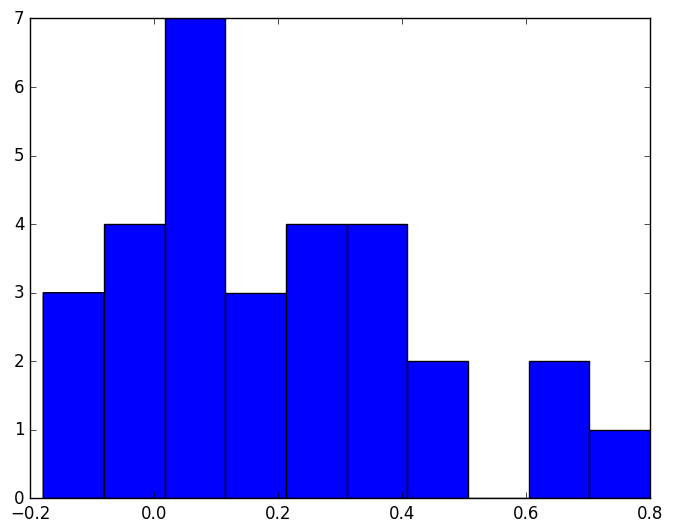

([3.0,4.0,7.0,3.0,4.0,4.0,2.0,0.0,2.0,1.0],[-0.178988,-0.0810936,0.016801,0.114696,0.21259,0.310485,0.40838,0.506274,0.604169,0.702064,0.799958],Any[PyObject <matplotlib.patches.Rectangle object at 0x326bd7650>,PyObject <matplotlib.patches.Rectangle object at 0x326bd7cd0>,PyObject <matplotlib.patches.Rectangle object at 0x326be3390>,PyObject <matplotlib.patches.Rectangle object at 0x326be3a10>,PyObject <matplotlib.patches.Rectangle object at 0x326be3f10>,PyObject <matplotlib.patches.Rectangle object at 0x326bef750>,PyObject <matplotlib.patches.Rectangle object at 0x326befdd0>,PyObject <matplotlib.patches.Rectangle object at 0x326bfa490>,PyObject <matplotlib.patches.Rectangle object at 0x326bfab10>,PyObject <matplotlib.patches.Rectangle object at 0x326c071d0>])

In [44]:
plt[:hist](w_ridge)

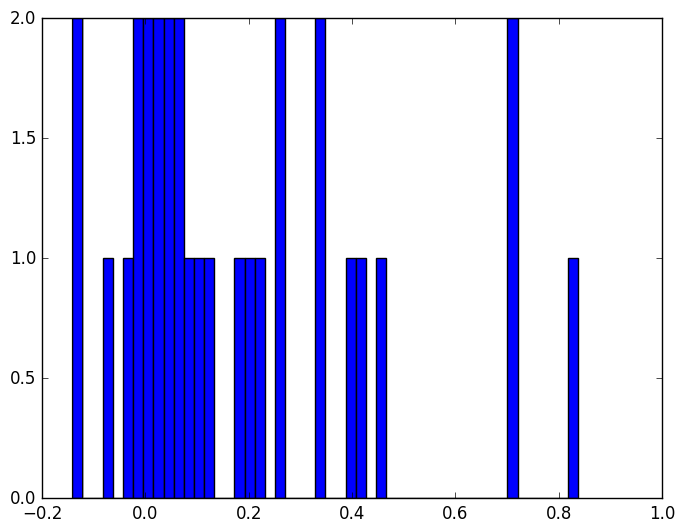

([2.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0  …  0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0],[-0.140888,-0.121316,-0.101744,-0.0821716,-0.0625994,-0.0430273,-0.0234551,-0.003883,0.0156891,0.0352613  …  0.66157,0.681142,0.700714,0.720286,0.739858,0.759431,0.779003,0.798575,0.818147,0.837719],Any[PyObject <matplotlib.patches.Rectangle object at 0x326e12550>,PyObject <matplotlib.patches.Rectangle object at 0x326e12bd0>,PyObject <matplotlib.patches.Rectangle object at 0x326e1e290>,PyObject <matplotlib.patches.Rectangle object at 0x326e1e910>,PyObject <matplotlib.patches.Rectangle object at 0x326e1ef90>,PyObject <matplotlib.patches.Rectangle object at 0x326e2b650>,PyObject <matplotlib.patches.Rectangle object at 0x326e2bcd0>,PyObject <matplotlib.patches.Rectangle object at 0x326e37390>,PyObject <matplotlib.patches.Rectangle object at 0x326e37a10>,PyObject <matplotlib.patches.Rectangle object at 0x326e37f10>  …  PyObject <matplotlib.patches.Rectangle object at 0x326ed8b90>,PyObject <matplotlib.pat

In [45]:
plt[:hist](w_lasso, bins=50)

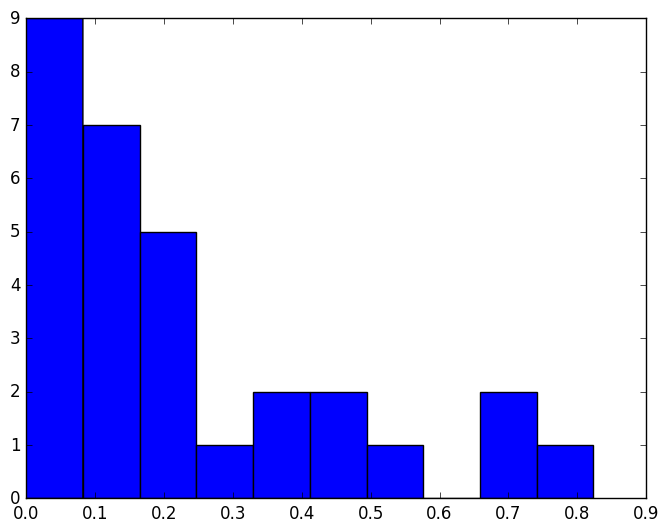

([9.0,7.0,5.0,1.0,2.0,2.0,1.0,0.0,2.0,1.0],[0.0,0.0823521,0.164704,0.247056,0.329409,0.411761,0.494113,0.576465,0.658817,0.741169,0.823521],Any[PyObject <matplotlib.patches.Rectangle object at 0x327135810>,PyObject <matplotlib.patches.Rectangle object at 0x327135e90>,PyObject <matplotlib.patches.Rectangle object at 0x327143550>,PyObject <matplotlib.patches.Rectangle object at 0x327143bd0>,PyObject <matplotlib.patches.Rectangle object at 0x32714f290>,PyObject <matplotlib.patches.Rectangle object at 0x32714f910>,PyObject <matplotlib.patches.Rectangle object at 0x32714ff90>,PyObject <matplotlib.patches.Rectangle object at 0x32715d650>,PyObject <matplotlib.patches.Rectangle object at 0x32715dcd0>,PyObject <matplotlib.patches.Rectangle object at 0x32716b390>])

In [46]:
plt[:hist](w_nonneg)

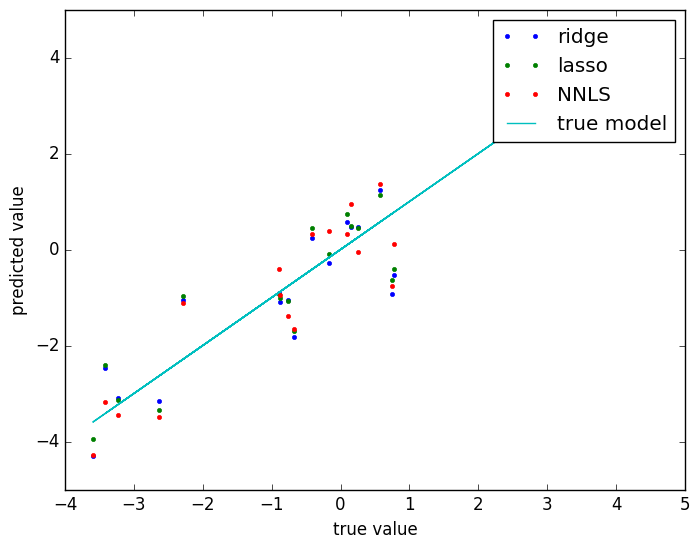

PyObject <matplotlib.text.Text object at 0x327177350>

In [47]:
# which fits data best?
Xtest,ytest = generate_data(20,w)

plot(ytest,Xtest*w_ridge,label="ridge",".")
plot(ytest,Xtest*w_lasso,label="lasso",".")
plot(ytest,Xtest*w_nonneg,label="NNLS",".")
plot(ytest,ytest,label="true model")
legend()
xlabel("true value")
ylabel("predicted value")

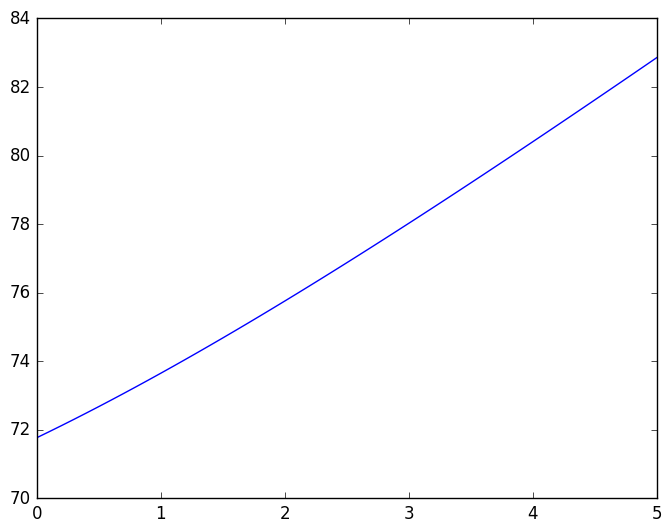

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3275f1490>

In [48]:
# cross validate over lambda

w = .5*randn(40)
X,y = generate_noisy_data(30, w)
Xtest,ytest = generate_noisy_data(30, w)

error = Float64[]
λs = 0:.1:5
for λ in λs
    w = ridge_regression(X,y; λ=λ, maxiters=maxiters, stepsize=stepsize)
    push!(error, sum((ytest - Xtest*w).^2))
end
plot(λs, error)